In [1]:
# from medpy.io import load
import nibabel as nib
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import MinMaxScaler
import glob
import numpy as np
scaler = MinMaxScaler()


In [2]:
flair_list = sorted(glob.glob("../dataset/brats2018/BraTS_2018_Data_Training/*/*/*flair.nii"))
mask_list = sorted(glob.glob("../dataset/brats2018/BraTS_2018_Data_Training/*/*/*seg.nii"))

In [3]:
len(flair_list), len(mask_list)

(285, 285)

In [4]:
def isTumor(mask_slice):
    if(np.sum(mask_slice)>=500):
        return True
    if(np.sum(mask_slice)<=50):
        return False

[0. 1. 2. 4.]
[0. 1.]


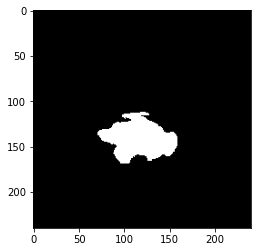

In [70]:
seg_mask = nib.load(mask_list[19]).get_fdata()
# plt.imshow(img[:,:,88], cmap = 'gray')
print(np.unique(seg_mask))
for i in range(2,5):    
    seg_mask[seg_mask == i] = 1
    
print(np.unique(seg_mask))
plt.imshow(seg_mask[:,:,99], cmap = 'gray')

In [68]:
for i in range(len(flair_list)):
    flair = nib.load(flair_list[i]).get_fdata()
    flair = scaler.fit_transform(flair.reshape(-1, flair.shape[-1])).reshape(flair.shape)
    mask = nib.load(mask_list[i]).get_fdata()
    for l in range(2,5):    
        mask[mask == l] = 1

    for n_slice in range(75,100):
        if(isTumor(mask[:,:,n_slice])):
            np.save('../NormalAndAbnormalImages2018/trainA/flair'+str(i)+'_slice'+str(n_slice)+'.npy', flair[:,:,n_slice])
            np.save('../NormalAndAbnormalImages2018/masks/mask' +str(i) +'_slice'+str(n_slice)+'.npy', mask[:,:,n_slice])

        else:
            np.save('../NormalAndAbnormalImages2018/trainN/flair'+str(i)+'_slice'+str(n_slice)+'.npy', flair[:,:,n_slice])



In [71]:
n = 32
slice = 83
flair_img_A = np.load('../NormalAndAbnormalImages2018/trainA/flair'+str(n)+'_slice'+str(slice)+'.npy')
binary_mask = np.load('../NormalAndAbnormalImages2018/masks/mask'+str(n)+'_slice'+str(slice)+'.npy')


Text(0.5, 1.0, 'Binary Mask')

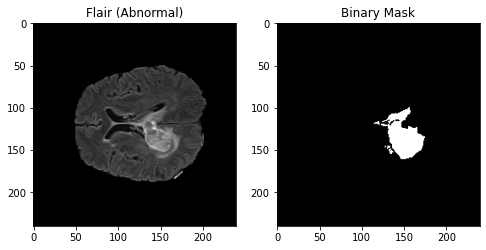

In [72]:
plt.figure(figsize=(8, 8))
plt.subplot(121)
plt.imshow(flair_img_A, cmap='gray')
plt.title('Flair (Abnormal)')
plt.subplot(122)
plt.imshow(binary_mask, cmap='gray')
plt.title('Binary Mask')

In [ ]:
# flair, _ = load(flair_list[0])
# flair = scaler.fit_transform(flair.reshape(-1, flair.shape[-1])).reshape(flair.shape)
# flair[:,:,90][100]

In [79]:
n=40
slice = 92
flair_img_N = np.load('../NormalAndAbnormalImages2018/trainN/flair'+str(n)+'_slice'+str(slice)+'.npy')

Text(0.5, 1.0, 'Flair (Normal)')

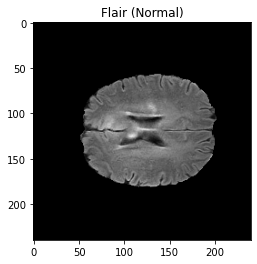

In [80]:
plt.imshow(flair_img_N, cmap='gray')
plt.title('Flair (Normal)')

In [81]:
flair_img_A[100,100]

0.20804438280166437

In [82]:
flair_img_N[100,100]

0.5751789976133652

### Abnormal And Normal Images

In [83]:
abnormal_list = sorted(glob.glob('../NormalAndAbnormalImages2018/trainA/*.*'))
binary_mask_list = sorted(glob.glob('../NormalAndAbnormalImages2018/masks/*.*'))
normal_list = sorted(glob.glob('../NormalAndAbnormalImages2018/trainN/*.*'))

In [84]:
len(abnormal_list), len(normal_list)

(5042, 2083)

In [108]:
index = random.randint(0,2083)
pathA = abnormal_list[index]
pathMask = binary_mask_list[index]
pathN = normal_list[index]
abnormal_image = np.load(pathA)
normal_image = np.load(pathN)
binary_mask = np.load(pathMask)

Text(0.5, 1.0, 'Flair (Normal)')

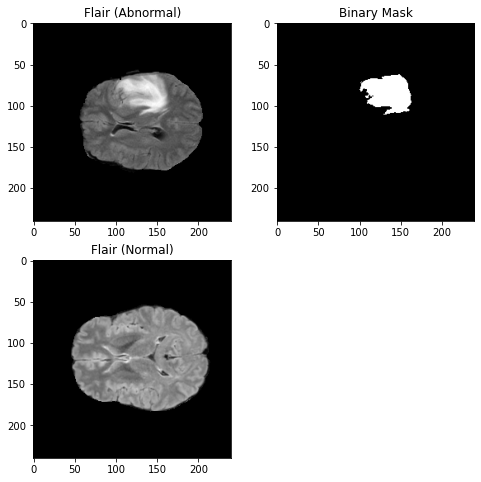

In [109]:
plt.figure(figsize=(8, 8))
plt.subplot(221)
plt.imshow(abnormal_image, cmap='gray')
plt.title('Flair (Abnormal)')
plt.subplot(222)
plt.imshow(binary_mask, cmap='gray')
plt.title('Binary Mask')
plt.subplot(223)
plt.imshow(normal_image, cmap='gray')
plt.title('Flair (Normal)')

### LGG Images

In [2]:
flair_list = sorted(glob.glob('../dataset/brats2015/BRATS2015_Training/LGG/*/*Flair*/*.mha'))
mask_list = sorted(glob.glob('../dataset/brats2015/BRATS2015_Training/LGG/*/*OT*/*.mha'))

In [39]:
flair, _ = load(flair_list[5])
mask, _ = load(mask_list[5])
n_slice=100

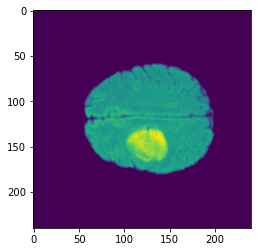

In [40]:
plt.imshow(flair[:,:,n_slice])

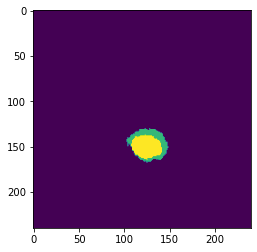

In [41]:
plt.imshow(mask[:,:,n_slice])

## Test Images